# Resume Screening project

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')


In [2]:
resume=pd.read_csv(r"C:\Users\RBC\Desktop\NLP Project\Resume Screening\UpdatedResumeDataSet.csv",encoding='utf-8')

In [3]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
#size
resume.shape

(962, 2)

In [28]:
#duplicated
resume.duplicated().sum()

796

In [6]:
resume['Cleaned_resume']=""
resume.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [7]:
#unique variable
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
resume['Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object>

In [9]:
#Visualization of dataset

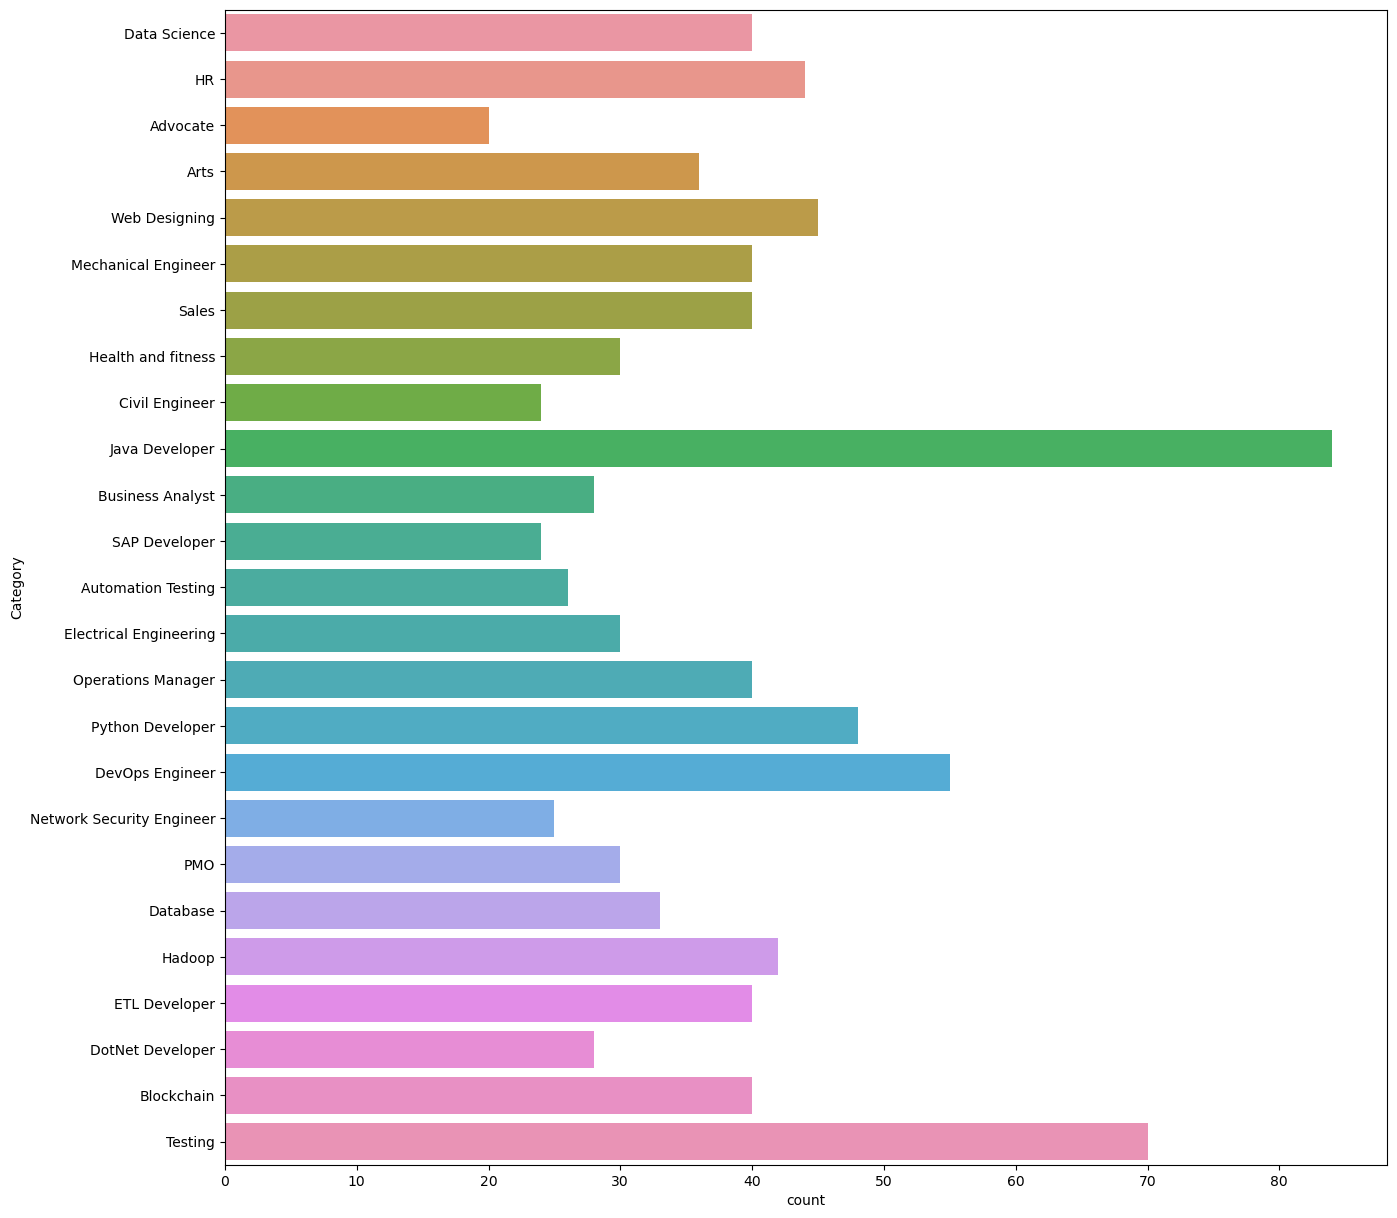

In [10]:
#countplot
plt.figure(figsize=(15,15))
sns.countplot(y='Category',data=resume)
plt.show()

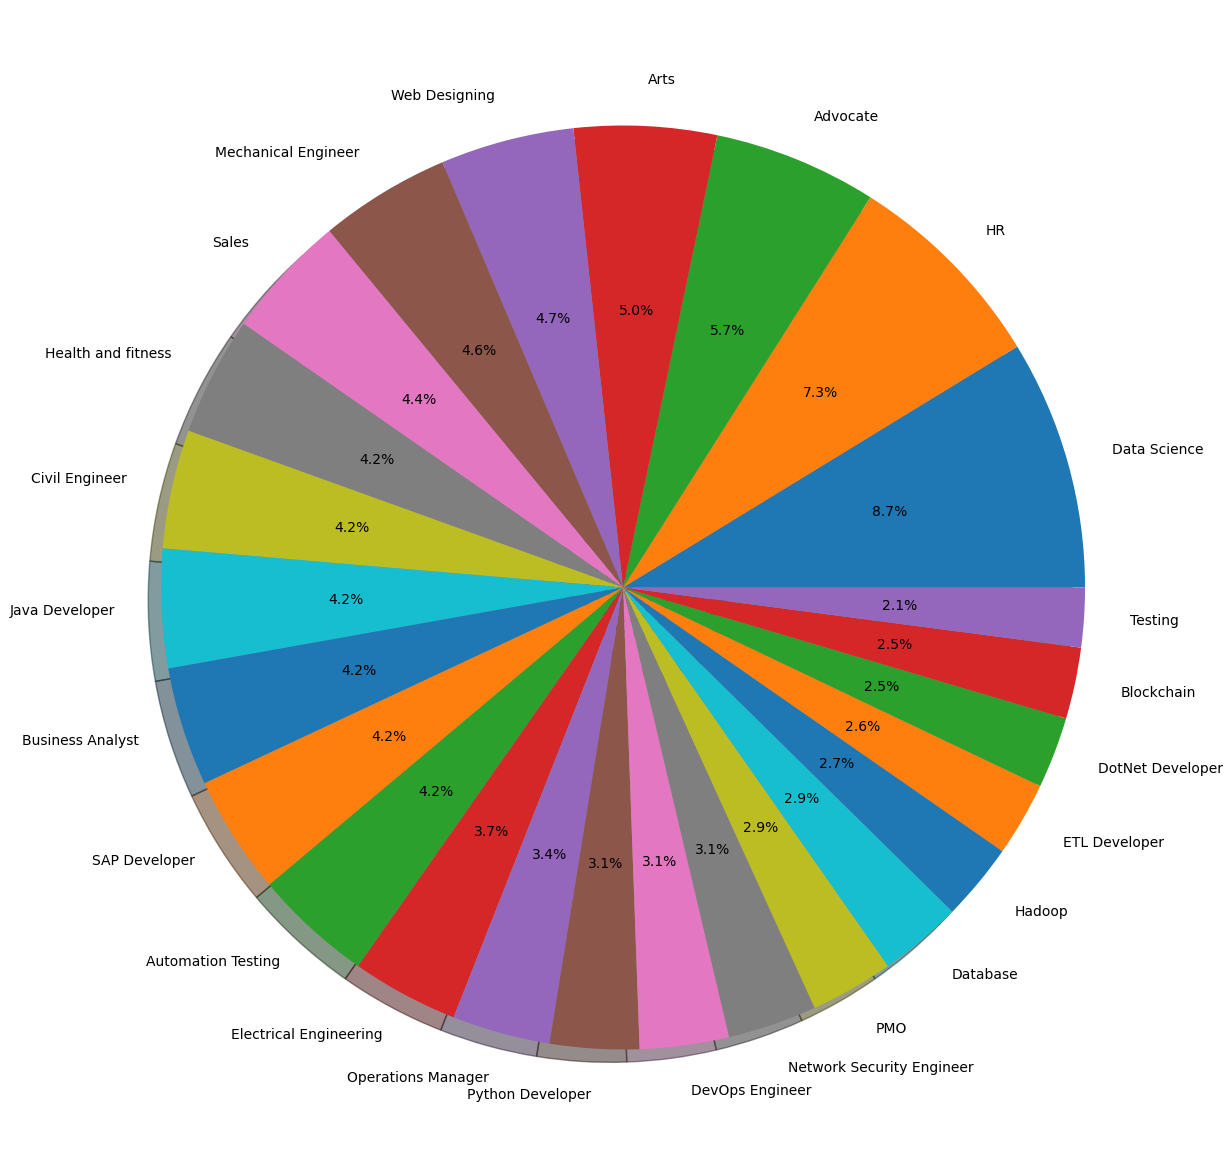

In [11]:
#pie chartplot
plt.figure(figsize=(15,15))
plt.pie(resume['Category'].value_counts(), labels=resume['Category'].unique(), autopct='%1.1f%%', shadow=True)
plt.show()

## Pre-processing of resume

Removing punctuation, token word, special words,letters,urls

In [12]:
#remove punctuations
import re
def cleaned_text(text):
    text=text.lower()
    text=re.sub('https\s+\s*',' ',text)#remove URLS
    text=re.sub("RT|cc",' ',text)#remove RT and CC
    text=re.sub('#\s+','',text)#remove Hashtag
    text=re.sub("@\s+",'',text)# remove Mentions
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ',text)  # remove URLs
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

In [13]:
resume['Cleaned_resume'] = resume.Resume.apply(lambda x: cleaned_text(x))

In [14]:
resume.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [15]:
#removing stopwords
from nltk.corpus import stopwords
stop_word=stopwords.words('english')

Now we will find word frequency,word weight and positive and negative word

In [16]:
import nltk
from wordcloud import WordCloud

In [17]:
totalword=[]
sentences=resume['Resume'].values
cleaned_sentence=''
for i in range(0,160):
    cleaned=cleaned_text(sentences[i])
    cleaned_sentence+=cleaned
    requiredword=nltk.word_tokenize(cleaned)
    for word in requiredword:
        if word not in stop_word and word not in string.punctuation:
            totalword.append(word)

In [18]:
#mostcommon frequency
wordfreqdist = nltk.FreqDist(totalword)
mostcommon = wordfreqdist.most_common(50)
mostcommon

[('details', 488),
 ('exprience', 446),
 ('data', 416),
 ('company', 398),
 ('months', 394),
 ('description', 358),
 ('1', 290),
 ('project', 254),
 ('year', 252),
 ('january', 216),
 ('learning', 210),
 ('science', 208),
 ('less', 204),
 ('skill', 190),
 ('python', 176),
 ('maharashtra', 166),
 ('6', 164),
 ('machine', 156),
 ('education', 146),
 ('college', 146),
 ('arts', 144),
 ('university', 140),
 ('skills', 134),
 ('development', 134),
 ('web', 134),
 ('like', 126),
 ('analytics', 120),
 ('india', 120),
 ('management', 120),
 ('application', 120),
 ('team', 116),
 ('software', 116),
 ('using', 110),
 ('business', 108),
 ('sql', 104),
 ('developed', 104),
 ('monthscompany', 102),
 ('time', 100),
 ('used', 98),
 ('b', 98),
 ('c', 98),
 ('experience', 96),
 ('mumbai', 96),
 ('projects', 94),
 ('knowledge', 94),
 ('analysis', 92),
 ('technologies', 92),
 ('hr', 92),
 ('engineering', 90),
 ('pune', 90)]

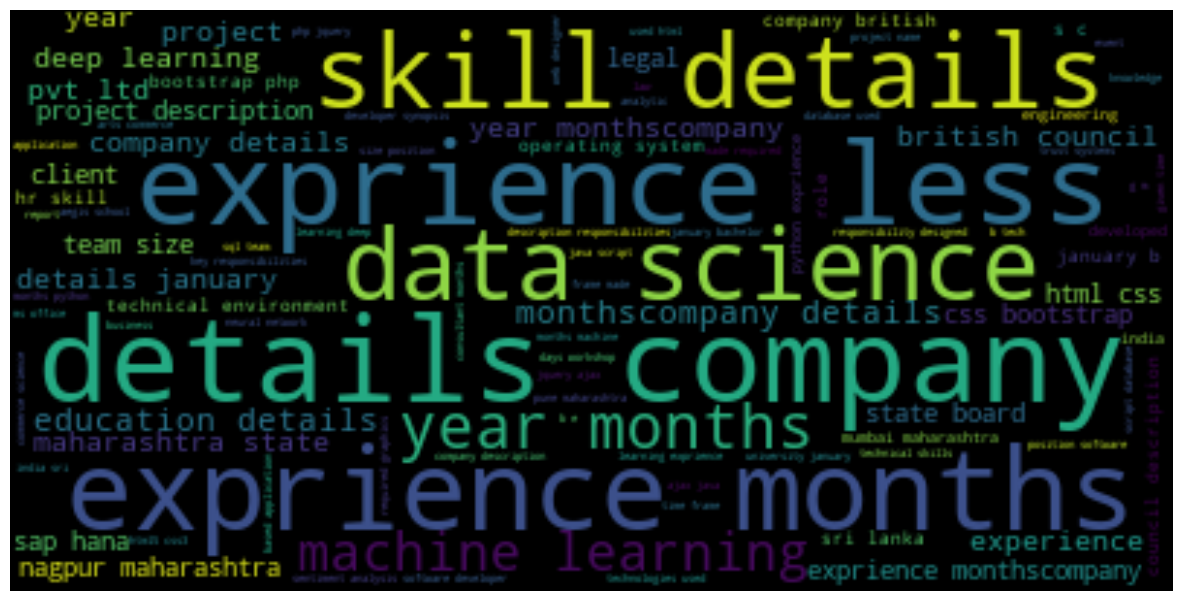

In [19]:
#wordcloud plot
wc = WordCloud().generate(cleaned_sentence)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will convert these words into categorical values:

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le=LabelEncoder()

In [21]:
for i in var_mod:
    resume[i]=le.fit_transform(resume[i])

### Training Machine Learning Model for Resume Screening

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [23]:
required_text=resume['Resume'].values
required_target=resume['Category'].values

In [24]:
word_vectorizer=TfidfVectorizer(sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(required_text)
wordfeatures=word_vectorizer.transform(required_text)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(wordfeatures,required_target,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


Now let’s train the model and print the classification report:

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [27]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.